INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_7604dc90925257f11509acdb49d1ae96 NOW.


[ 907.45634488  845.30230674 1036.43975463 1344.14988042  949.95727364
  671.91929817 1259.40406826 1075.68684022  943.18954251  789.57236081
 1057.6781803   925.52868092  498.01750852  681.4719651   929.23442834
 1149.33347171  831.16047079 1140.44269453 1026.5090987  1188.57748651]
         Salary  TimeToTravel  JobSatisfaction
0   1007.082729    605.336456       907.456345
1    938.185378    564.052131       845.302307
2   1151.381511    690.073490      1036.439755
3   1492.103336    896.347873      1344.149880
4   1054.099895    633.653482       949.957274
5    745.594413    448.527607       671.919298
6   1398.279512    839.138955      1259.404068
7   1193.722123    716.589495      1075.686840
8   1046.213767    628.018488       943.189543
9    876.032573    526.117627       789.572361
10  1174.186089    704.848480      1057.678180
11  1027.557308    617.492420       925.528681
12   552.350807    332.264475       498.017509
13   755.595498    453.907729       681.471965
14  1031.5

Inference for Stan model: anon_model_7604dc90925257f11509acdb49d1ae96.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha   0.59    0.05   0.42  -0.27   0.31   0.58   0.87   1.44     67   1.04
betax   0.73    0.01   0.09   0.56   0.67   0.73   0.79   0.94     42    1.1
betay   0.28    0.02   0.16  -0.07   0.18   0.29   0.38   0.57     42    1.1
sigma   0.37    0.01   0.08   0.25   0.32   0.36    0.4    0.6     41   1.12
lp__    9.68    0.25   1.85   4.21   8.88  10.16  11.01  11.81     56   1.08

Samples were drawn using NUTS at Mon Feb  7 00:35:20 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


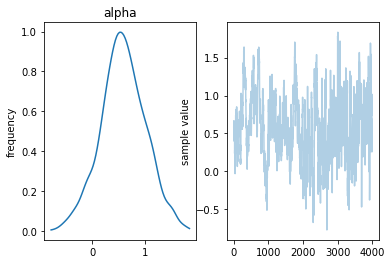

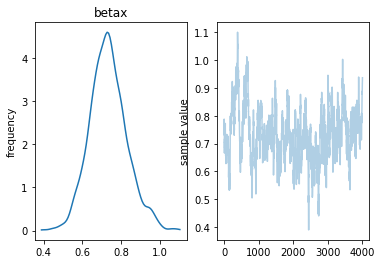

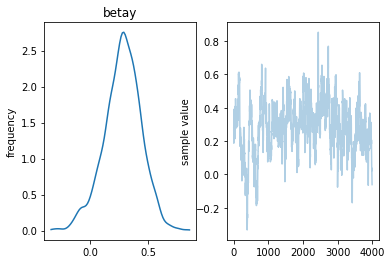

In [1]:
import pystan
from numpy import *
import matplotlib.pyplot as plt
import pandas as pd

obs = 20
salary = random.normal(1000, 200, obs) #salary
alpha = 0.7
beta_x = 0.6
beta_y = 0.5
sigma = 0.4
timetotravel = alpha + beta_x * salary
timetotraveldata = random.normal(timetotravel,sigma,obs) #timetotravel
z_sample = alpha + beta_x * salary + beta_y * timetotraveldata #job satisfaction
sim_data = random.normal(z_sample,sigma,obs)
print(sim_data) #simulated data

model = """
data {
   int<lower=4> N; // Number of data points
   real Salary[N];      // the 1st predictor
   real TimeToTravel[N];      // the 2nd predictor
   real JobSatisfaction[N];  // the outcome
   
}
parameters {
   real alpha;     // intercept
   real betax;     // x-slope
   real betay; // y-slope
   real<lower=0> sigma;       // dispersion
}
model {
   alpha ~ normal(0,1);
   betax ~ normal(0,1);
   betay ~ normal(0,1);
   sigma ~ uniform(0,3);
   for (i in 1:N)
      JobSatisfaction[i] ~ normal(alpha + betax * Salary[i] + betay * TimeToTravel[i], sigma); 
}"""

data = {'N':obs, 'Salary':salary, 'TimeToTravel':timetotraveldata, 'JobSatisfaction':sim_data}
df = pd.DataFrame(data, columns=['N', 'Salary', 'TimeToTravel', 'JobSatisfaction'])
dfnew = df.drop('N', axis=1)
print(dfnew)
dfnew.to_csv('Simulated.csv')
sm = pystan.StanModel(model_code=model)
fit= sm.sampling(data=data)
summary = fit.summary()
fit.plot('alpha')
fit.plot('betax')
fit.plot('betay')
print(fit)